In [1]:
using Revise

ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
using FileIO
using JLD2
using RiskSensitiveSAC

┌ Info: Number of Julia Thread(s): 1
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:39
┌ Info: CUDA Device: GeForce RTX 2080 Ti
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:40
┌ Info: Python executable used by PyCall: /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/env_trajectron++/bin/python3.6
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:41


In [2]:
include("$(@__DIR__)/../scripts/default_params/params_data_gaussian.jl");

min_dist = 0.8;  # minimum separation distance required 

include("$(@__DIR__)/../scripts/parameter_setup_bic.jl");

In [3]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param,
                 cost_param=cost_param,
                 cnt_param=cnt_param,
                 dtc=dtc,
                 prediction_steps=prediction_steps,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=true);

Scene Mode: data
BIC Controller
Loaded evaluation data from /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/Trajectron-plus-plus/experiments/processed/eth_test.pkl
Looking at the eth_test.pkl sequence, data_id 0, start_idx 905


In [4]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec, target_speed,
                  measurement_schedule, target_trajectory, pos_error_replan);

┌ Warning: Time 0.00 [sec]: BIC computation took 23.327 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/bic.jl:289
┌ Warning: Time 0.00 [sec]: This evaluation iteration took 0.319 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/evaluation.jl:254


In [5]:
display_log(result.log)

Time 0.00 [sec]: New BIC control computation is scheduled.
Time 0.00 [sec]: New BIC control is available to the controller.
Time 0.00 [sec]: Control: [1.9349775975834911e-10, 4.026850190477946e-9] is applied to the system.
Time 0.02 [sec]: Control: [1.9349775975834911e-10, 4.026850190477946e-9] is applied to the system.
Time 0.04 [sec]: Control: [1.9349775975834911e-10, 4.026850190477946e-9] is applied to the system.
Time 0.06 [sec]: Control: [1.9349775975834911e-10, 4.026850190477946e-9] is applied to the system.
Time 0.08 [sec]: Control: [1.9349775975834911e-10, 4.026850190477946e-9] is applied to the system.
Time 0.10 [sec]: New BIC control computation is scheduled.
Time 0.10 [sec]: Control: [1.9349775975834911e-10, 4.026850190477946e-9] is applied to the system.
Time 0.12 [sec]: New BIC control is available to the controller.
Time 0.12 [sec]: Control: [8.144791347690477e-9, -0.07769778122369485] is applied to the system.
Time 0.14 [sec]: Control: [8.144791347690477e-9, -0.077697781

Time 1.64 [sec]: Control: [2.2573511215606516e-8, 0.15180374200861324] is applied to the system.
Time 1.66 [sec]: Control: [2.2573511215606516e-8, 0.15180374200861324] is applied to the system.
Time 1.68 [sec]: Control: [2.2573511215606516e-8, 0.15180374200861324] is applied to the system.
Time 1.70 [sec]: New BIC control computation is scheduled.
Time 1.70 [sec]: Control: [2.2573511215606516e-8, 0.15180374200861324] is applied to the system.
Time 1.72 [sec]: New BIC control is available to the controller.
Time 1.72 [sec]: Control: [1.2565649565239841e-8, 0.06492113198150835] is applied to the system.
Time 1.74 [sec]: Control: [1.2565649565239841e-8, 0.06492113198150835] is applied to the system.
Time 1.76 [sec]: Control: [1.2565649565239841e-8, 0.06492113198150835] is applied to the system.
Time 1.78 [sec]: Control: [1.2565649565239841e-8, 0.06492113198150835] is applied to the system.
Time 1.80 [sec]: New BIC control computation is scheduled.
Time 1.80 [sec]: Control: [1.256564956523

Time 3.30 [sec]: Control: [-7.553504857850544e-9, 0.14348856295615686] is applied to the system.
Time 3.32 [sec]: New BIC control is available to the controller.
Time 3.32 [sec]: Control: [-6.8747205049622505e-9, 0.05350949104473537] is applied to the system.
Time 3.34 [sec]: Control: [-6.8747205049622505e-9, 0.05350949104473537] is applied to the system.
Time 3.36 [sec]: Control: [-6.8747205049622505e-9, 0.05350949104473537] is applied to the system.
Time 3.38 [sec]: Control: [-6.8747205049622505e-9, 0.05350949104473537] is applied to the system.
Time 3.40 [sec]: New BIC control computation is scheduled.
Time 3.40 [sec]: Control: [-6.8747205049622505e-9, 0.05350949104473537] is applied to the system.
Time 3.42 [sec]: New BIC control is available to the controller.
Time 3.42 [sec]: Control: [-1.5154255099625817e-9, -0.03436771256836557] is applied to the system.
Time 3.44 [sec]: Control: [-1.5154255099625817e-9, -0.03436771256836557] is applied to the system.
Time 3.46 [sec]: Control: 

Time 4.94 [sec]: Control: [1.7251652755951281e-7, 0.03984271945845274] is applied to the system.
Time 4.96 [sec]: Control: [1.7251652755951281e-7, 0.03984271945845274] is applied to the system.
Time 4.98 [sec]: Control: [1.7251652755951281e-7, 0.03984271945845274] is applied to the system.
Time 5.00 [sec]: New BIC control computation is scheduled.
Time 5.00 [sec]: Control: [1.7251652755951281e-7, 0.03984271945845274] is applied to the system.
Time 5.02 [sec]: New BIC control is available to the controller.
Time 5.02 [sec]: Control: [-1.9071392407539099e-6, -0.04702549089494729] is applied to the system.
Time 5.04 [sec]: Control: [-1.9071392407539099e-6, -0.04702549089494729] is applied to the system.
Time 5.06 [sec]: Control: [-1.9071392407539099e-6, -0.04702549089494729] is applied to the system.
Time 5.08 [sec]: Control: [-1.9071392407539099e-6, -0.04702549089494729] is applied to the system.
Time 5.10 [sec]: New BIC control computation is scheduled.
Time 5.10 [sec]: Control: [-1.907

Time 6.62 [sec]: New BIC control is available to the controller.
Time 6.62 [sec]: Control: [-0.4292034314788172, -0.2446725120243976] is applied to the system.
Time 6.64 [sec]: Control: [-0.4292034314788172, -0.2446725120243976] is applied to the system.
Time 6.66 [sec]: Control: [-0.4292034314788172, -0.2446725120243976] is applied to the system.
Time 6.68 [sec]: Control: [-0.4292034314788172, -0.2446725120243976] is applied to the system.
Time 6.70 [sec]: New BIC control computation is scheduled.
Time 6.70 [sec]: Control: [-0.4292034314788172, -0.2446725120243976] is applied to the system.
Time 6.72 [sec]: New BIC control is available to the controller.
Time 6.72 [sec]: Control: [-0.39206832192700825, 0.3280136944620506] is applied to the system.
Time 6.74 [sec]: Control: [-0.39206832192700825, 0.3280136944620506] is applied to the system.
Time 6.76 [sec]: Control: [-0.39206832192700825, 0.3280136944620506] is applied to the system.
Time 6.78 [sec]: Control: [-0.39206832192700825, 0.

Time 8.32 [sec]: New BIC control is available to the controller.
Time 8.32 [sec]: Control: [0.28709162044997233, -1.028483276872839] is applied to the system.
Time 8.34 [sec]: Control: [0.28709162044997233, -1.028483276872839] is applied to the system.
Time 8.36 [sec]: Control: [0.28709162044997233, -1.028483276872839] is applied to the system.
Time 8.38 [sec]: Control: [0.28709162044997233, -1.028483276872839] is applied to the system.
Time 8.40 [sec]: New measurement is obtained.
Time 8.40 [sec]: New BIC control computation is scheduled.
Time 8.40 [sec]: Control: [0.28709162044997233, -1.028483276872839] is applied to the system.
Time 8.42 [sec]: New BIC control is available to the controller.
Time 8.42 [sec]: Control: [-0.015913498699518035, -1.5445889302993112] is applied to the system.
Time 8.44 [sec]: Control: [-0.015913498699518035, -1.5445889302993112] is applied to the system.
Time 8.46 [sec]: Control: [-0.015913498699518035, -1.5445889302993112] is applied to the system.
Time

In [6]:
result.total_cnt_cost

0.8360909147791791

In [7]:
result.total_pos_cost

0.9962475037152767

In [8]:
result.total_col_cost

45.183527124384874

In [9]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

47.01586554287933

In [10]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

0.27733927055910157

┌ Warning: No prediction is available with BIC Controller
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/utils.jl:619
Progress: 100%|█████████████████████████████████████████| Time: 0:00:31
┌ Info: Saved animation to 
│   fn = /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/notebook/6_bic_data.gif
└ @ Plots /home/haruki/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/notebook/6_bic_data.gif")
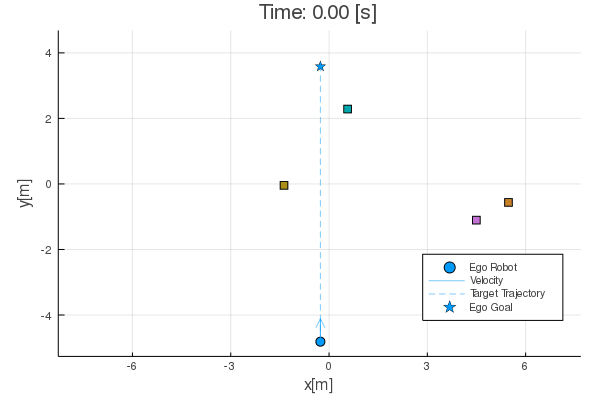

In [11]:
make_gif(result, dtplot=0.02, fps=50, xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -5.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="6_bic_data.gif")

In [12]:
save("6_bic_data.jld2", "result", result)